<h1 style='color:blue'>Carteiro Virtual - Reconhecimento de números escritos a mão usando</h1>

Vejamos um exemplo concreto de uma rede neural 
para a classificar os números escritos a mão. 

O problema que estamos tentando resolver aqui é classificar imagens em escala de cinza de letras de números escritos a mão de tal forma que depois a gente possa desenvolver um programa que lê um digito que uma pessoa escreveu e o programa tem que dizer qual o número que ela escreveu. 

<img src='correios.jpg' width="50%"/>


***O MNIST***
 
Mnist é um conjunto de dados de imagens, um clássico na comunidade de aprendizagem de máquinas, montado pelo Instituto Nacional de Padrões e Tecnologia (o NIST em MNIST) na década de 1980.

Exemplo das imagens do MNIST
<img src='mnist_examples.png' width="50%"/>

Como está organizado o MNIST
<img src='mnist_img_classe.png' width="30%"/>

### IMPORTANDO O MNIST

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

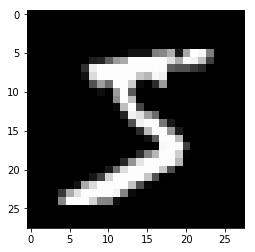

5


In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(train_images[0], cmap='gray')
plt.show()

print(train_labels[0])

In [5]:
## VERIFICANDO O TAMANHO DO DATASET

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### FLATTENING

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

### Normalizando

In [11]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

### Categorizando One Hot Encoder

In [12]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Importando Tensorflow e keras

In [13]:
from tensorflow.keras import models, layers

### Criando a rede neural

In [14]:
model = models.Sequential()
model.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Criando compilador keras

In [15]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Treinando a Rede Neural

In [ ]:
model.fit(train_images, train_labels, epochs=100, batch_size=128)

Epoch 1/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.4271 - acc: 0.8836
Epoch 2/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.2356 - acc: 0.9307
Epoch 3/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.1785 - acc: 0.9477
Epoch 4/100
60000/60000 [==============================] - 8s 135us/step - loss: 0.1398 - acc: 0.9591
Epoch 5/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1126 - acc: 0.9674
Epoch 6/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.0928 - acc: 0.9735: 1s - loss: 0.09
Epoch 7/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.0785 - acc: 0.9772
Epoch 8/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.0665 - acc: 0.9806
Epoch 9/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0574 - acc: 0.9833
Epoch 10/100
60000/60000 [==============================] - 4s 58us/step 

60000/60000 [==============================] - 3s 48us/step - loss: 1.0639e-06 - acc: 1.0000
Epoch 80/100
60000/60000 [==============================] - 3s 48us/step - loss: 5.2055e-07 - acc: 1.0000
Epoch 81/100
60000/60000 [==============================] - 3s 46us/step - loss: 4.6939e-07 - acc: 1.0000
Epoch 82/100
60000/60000 [==============================] - 3s 46us/step - loss: 7.6411e-07 - acc: 1.0000
Epoch 83/100
60000/60000 [==============================] - 4s 59us/step - loss: 5.7015e-07 - acc: 1.0000
Epoch 84/100
60000/60000 [==============================] - 3s 45us/step - loss: 3.1846e-07 - acc: 1.0000
Epoch 85/100
60000/60000 [==============================] - 3s 46us/step - loss: 2.8910e-07 - acc: 1.0000
Epoch 86/100
60000/60000 [==============================] - 3s 46us/step - loss: 2.6648e-07 - acc: 1.0000
Epoch 87/100
60000/60000 [==============================] - 3s 46us/step - loss: 2.5171e-07 - acc: 1.0000
Epoch 88/100
60000/60000 [==============================] -

## VERIFICANDO A ACURÁCIA DA REDE

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [ ]:
print('test_acc:', test_acc)

## Salvando o modelo

In [ ]:
model.save("Carteiro.h5")